# Lab 1: **Kernels** and **features**

Advanced Topics in Machine Learning -- Spring 2023, UniTS

<a target="_blank" href="https://colab.research.google.com/github/ganselmif/adv-ml-units/blob/main/notebooks/AdvML_UniTS_2023_Lab_01_Intro_to_Kernels.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

### Empirical verification of the *Kernel* $\leftrightarrow$ *feature expansion* equivalence

Recall the definition of *kernel*:
> Let $\mathcal{X}$ be a non-empty set. A function $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$ is called a *kernel* if there exists a real-Hilbert space $\mathcal{H}$ and a map $\phi: \mathcal{X} \rightarrow \mathcal{H}$ such that $\forall x, x^\prime \in \mathcal{X}$, $k(x, x^\prime) := \langle \phi(x) , \phi(x^\prime) \rangle_{\mathcal{H}}$.

To motivate the usefulness of kernelized ML methods, we can show that -- for $x\in\mathbb{R}^{d \in \mathbb{N}}$ -- the computation of $k(x, x^\prime)$ in kernel form is equivalent to the explicit scalar product $\langle \varphi(x) , \varphi(x^\prime) \rangle = \varphi(x)^{T} \varphi(x^\prime)$ of some corresponding expanded feature maps $\varphi: {R}^{d} \rightarrow \mathbb{R}^{d^\prime}$ with generally $d^\prime \gg d$ (or even *infinite-dimensional* $\varphi$s), though significantly simpler and more efficient to compute.

In the lab that follows, verify such equivalence for simple kernels: the non-uniform *quadratic* (in $\mathbb{R}^{d}$) and the *Gaussian* (in $\mathbb{R}$).

For each kernel:

1. Implement a function that computes the kernel between two arrays of coordinates;
2. Derive the explicit feature map $\varphi(x)$ corresponding to that kernel;
3. Implement a function that computes such feature map for a given array of coordinates;
4. Verify that the kernel computed by (1) and the scalar product of its arguments through (3) are indeed equivalent.

**Hint**: in case of need, you can finitely approximate the feature map by Taylor expansion.


In [1]:
import numpy as np
import itertools

In [2]:
def nu_quadratic_kernel(x, x_prime):
    """Compute the quadratic kernel between two arrays of coordinates.

    Parameters
    ----------
    x : array-like, shape (n_features)
        First array of coordinates.
    x_prime : array-like, shape (n_features)
        Second array of coordinates.

    Returns
    -------
    k : array-like, shape (1)
        Kernel value.
    """
    return (np.dot(x, x_prime))**2

    #raise NotImplementedError()

In [3]:
def nu_quadratic_feature_map(x):
    """Compute the feature map corresponding to the quadratic kernel.

    Parameters
    ----------
    x : array-like, shape (n_features)
        Array of coordinates.

    Returns
    -------
    phi_x : array-like, shape (n_features)
        Feature map.
    """
    # find the dimension of x
    d = np.shape(x)[0]
    
    # define an empty array of size d^2
    phi_x = np.empty(d**2)
    j = 0
    for i in itertools.product(x,x):
        phi_x[j] = i[0]*i[1]
        j = j+1
    return phi_x
    
    
    #raise NotImplementedError()

In [4]:
# Check that the two functions are equivalent on a randomly-initialized array

v = np.random.rand(10)
v_prime = np.random.rand(10)

print(nu_quadratic_kernel(v, v_prime))
print(np.dot(nu_quadratic_feature_map(v), nu_quadratic_feature_map(v_prime)))

9.499512422309694
9.499512422309696


In [5]:
def gaussian_kernel(x, x_prime, sigma):
    """Compute the Gaussian kernel between two arrays of coordinates.

    Parameters
    ----------
    x : array-like, shape (n_features)
        First array of coordinates.
    x_prime : array-like, shape (n_features)
        Second array of coordinates.
    sigma : float
        Kernel standard deviation.

    Returns
    -------
    k : array-like, shape (1)
        Kernel value.
    """
    
    return np.exp(-((x-x_prime)**2)/(2*sigma**2))
    
    #raise NotImplementedError()

In [6]:
def gaussian_feature_map(x, sigma, order):
    """Compute the feature map corresponding to the Gaussian kernel.

    Parameters
    ----------
    x : array-like, shape (n_features)
        Array of coordinates.
    sigma : float
        Kernel standard deviation.

    Returns
    -------
    phi_x : array-like, shape (n_features)
        Feature map.
    """
    # cut taylor expansion of exponential at 'order' term (order is a number telling when i should cut te taylor expansion
    
    c = np.exp(-(x**2)/(2*(sigma**2)))
    
    phi = np.empty(order)
    phi[0] = c
    
    for i in range(1, order):
        phi[i] = c*(np.sqrt(1/(np.math.factorial(i)*(sigma**(2*i)))))*(x**i)
    
    return phi
    
    #raise NotImplementedError()

In [7]:
# Check that the two functions are equivalent on a randomly-initialized array
import numpy as np
v = 0.2
v_prime = 0.1
order = 100

print(gaussian_kernel(v, v_prime, sigma = 1))
print(np.dot(gaussian_feature_map(v, sigma = 1, order=order), gaussian_feature_map(v_prime, sigma = 1, order=order)))

0.9950124791926823
0.9950124791926823


In [23]:
# plot euclidean distance wrt distance after gaussian kernel mapping

from matplotlib import pyplot as plt
sigma = 1

x = 0

x_prime = np.linspace(-2,2,100)

e_dist = np.empty(len(x_prime))
g_dist = np.empty(len(x_prime))

for i in range(len(x_prime)):
    e_dist[i] = (x-x_prime[i])
    g_dist[i] = np.sqrt(2*(1- gaussian_kernel(x, x_prime = x_prime[i], sigma=sigma)))


plt.plot(e_dist, g_dist)




In [26]:
def plot_euclidean_vs_gauss(sigma):
    x = 0

    x_prime = np.linspace(-2,2,100)

    e_dist = [(x-x_prime[i]) for i in range(len(x_prime))]
    g_dist = [np.sqrt(2*(1- gaussian_kernel(x, x_prime = x_prime[i], sigma=sigma))) for i in range(len(x_prime))]

    plt.plot(e_dist, g_dist)

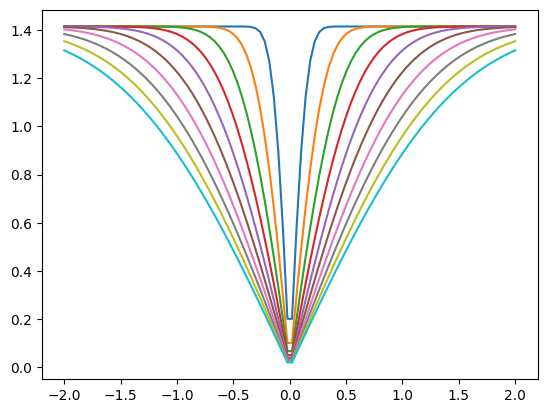

In [28]:
for i in np.linspace(0.1,1,10):
    plot_euclidean_vs_gauss(i)